# Credit Card Fraud Detection - UpGrad Capstone Project
by Vladimir Nikonov

## Problem Statement

In the banking industry, detecting credit card fraud using machine learning is not just a trend; it is a necessity for banks, as they need to put proactive monitoring and fraud prevention mechanisms in place. Machine learning helps these institutions reduce time-consuming manual reviews, costly chargebacks and fees, and denial of legitimate transactions.

## Data Importing and Understanding

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Setting max columns to 50

pd.set_option('display.max_columns', 50)

In [3]:
# Reading the datasets and displaying the train dataset

train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')
train_df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street            city state    zip  \
0    Banks      F                561 Perry Cove  Moravian Falls    NC  28654   
1     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252   
3    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat      long  city_pop                                job         dob  \
0  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09   
1  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21   
2  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19   
3  46.2306 -112.1138      1939                    Patent attorney  1967-01-12   
4  38.4207  -79.4629        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [4]:
test_df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city state    zip  \
0   Elliott      M            351 Darlene Green    Columbia    SC  29209   
1  Williams      F             3638 Marsh Union     Altonah    UT  84002   
2     Lopez      F         9333 Valentine Point    Bellmore    NY  11710   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville    FL  32780   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth    MI  49632   

       lat      long  city_pop                     job         dob  \
0  33.9659  -80.9355    333497     Mechanical engineer  1968-03-19   
1  40.3207 -110.4360       302  Sales professional, IT  1990-01-17   
2  40.6729  -73.5365     34496       Librarian, public  1970-10-21   
3  28.5697  -80.8191     54767            Set designer  1987-07-25   
4  44.2529  -85.0170      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

## Exploratory Data Analysis

In [5]:
# Shape and info of the train dataset

print('Train Dataset Shape:', train_df.shape)
train_df.info()

Train Dataset Shape: (1296675, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-nu

In [6]:
# Shape and info of the test dataset

print('Test Dataset Shape:', test_df.shape)
test_df.info()

Test Dataset Shape: (555719, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  lon

From the info, we observe that *'trans_date_trans_time'* and *'dob'* in both datasets are of the wrong data type

In [7]:
# Converting ['trans_date_trans_time', 'dob'] to datetime

train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
train_df['dob'] = pd.to_datetime(train_df['dob'])

test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])
test_df['dob'] = pd.to_datetime(test_df['dob'])

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             555719 non-null  int64         
 1   trans_date_trans_time  555719 non-null  datetime64[ns]
 2   cc_num                 555719 non-null  int64         
 3   merchant               555719 non-null  object        
 4   category               555719 non-null  object        
 5   amt                    555719 non-null  float64       
 6   first                  555719 non-null  object        
 7   last                   555719 non-null  object        
 8   gender                 555719 non-null  object        
 9   street                 555719 non-null  object        
 10  city                   555719 non-null  object        
 11  state                  555719 non-null  object        
 12  zip                    555719 non-null  int6

In [9]:
# Removing ['Unnamed: 0']

train_df = train_df.drop('Unnamed: 0', axis=1)
test_df = test_df.drop('Unnamed: 0', axis=1)

train_df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city state    zip      lat  \
0                561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2      594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3   9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4              408 Bradley Rest        Doe Hill    VA  24433  38.4207   

       long  city_pop                                job        dob  \
0  -81.1781      3495          Psychologist, counselling 1988-03-09   
1 -118.2105       149  Special educational needs teacher 1978-06-21   
2 -112.2620      4154        Nature conservation officer 1962-01-19   
3 -112.1138      1939                    Patent attorney 1967-01-12   
4  -79.4629        99     Dance movement psychotherapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [10]:
test_df.head()

trans_date_trans_time            cc_num  \
0   2020-06-21 12:14:25  2291163933867244   
1   2020-06-21 12:14:33  3573030041201292   
2   2020-06-21 12:14:53  3598215285024754   
3   2020-06-21 12:15:15  3591919803438423   
4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city state    zip  \
0   Elliott      M            351 Darlene Green    Columbia    SC  29209   
1  Williams      F             3638 Marsh Union     Altonah    UT  84002   
2     Lopez      F         9333 Valentine Point    Bellmore    NY  11710   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville    FL  32780   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth    MI  49632   

       lat      long  city_pop                     job        dob  \
0  33.9659  -80.9355    333497     Mechanical engineer 1968-03-19   
1  40.3207 -110.4360       302  Sales professional, IT 1990-01-17   
2  40.6729  -73.5365     34496       Librarian, public 1970-10-21   
3  28.5697  -80.8191     54767            Set designer 1987-07-25   
4  44.2529  -85.0170      1126      Furniture designer 1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [11]:
# Dropping columns unnecessary for model building (['cc_num', 'merchant', 'first', 'last', 'street', 'zip', 'trans_num', 'unix_time'])

drop_cols = ['cc_num', 'merchant', 'first', 'last', 'street', 'zip', 'trans_num', 'unix_time']

train_df = train_df.drop(drop_cols, axis=1)
test_df = test_df.drop(drop_cols, axis=1)

train_df.head()

trans_date_trans_time       category     amt gender            city state  \
0   2019-01-01 00:00:18       misc_net    4.97      F  Moravian Falls    NC   
1   2019-01-01 00:00:44    grocery_pos  107.23      F          Orient    WA   
2   2019-01-01 00:00:51  entertainment  220.11      M      Malad City    ID   
3   2019-01-01 00:01:16  gas_transport   45.00      M         Boulder    MT   
4   2019-01-01 00:03:06       misc_pos   41.96      M        Doe Hill    VA   

       lat      long  city_pop                                job        dob  \
0  36.0788  -81.1781      3495          Psychologist, counselling 1988-03-09   
1  48.8878 -118.2105       149  Special educational needs teacher 1978-06-21   
2  42.1808 -112.2620      4154        Nature conservation officer 1962-01-19   
3  46.2306 -112.1138      1939                    Patent attorney 1967-01-12   
4  38.4207  -79.4629        99     Dance movement psychotherapist 1986-03-28   

   merch_lat  merch_long  is_fraud  
0  36.011293  -82.048315         0  
1  49.159047 -118.186462         0  
2  43.150704 -112.154481         0  
3  47.034331 -112.561071         0  
4  38.674999  -78.632459         0

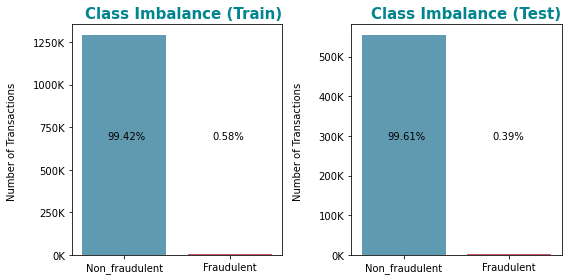

In [12]:
# Displaying Class Imbalance for both datasets

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Train

train_target = train_df["is_fraud"].value_counts()
train_share_non_fraud = train_target[0]/train_df['is_fraud'].count()*100
train_share_fraud = train_target[1]/train_df['is_fraud'].count()*100

plt.subplot(1, 2, 1)
plt.title("Class Imbalance (Train)", loc='right', fontdict={'fontsize': 15, 'fontweight': 'demibold', 'color': '#00858f'})
train_imbalance_plt = sns.barplot(x=train_target.index, y=train_target, palette=["#52a0be", "#de425b"])
train_imbalance_plt.set_xticklabels(["Non_fraudulent", "Fraudulent"])
plt.ylabel("Number of Transactions \n")
yticks = np.arange(0, 1.5*10**6, 0.25*10**6)
yticklabels = ['{}K'.format(int(i/10**3))for i in yticks]
train_imbalance_plt.set_yticks(yticks)
train_imbalance_plt.set_yticklabels(yticklabels)
plt.annotate("{0:.4}%".format(train_share_non_fraud),(0.17, 0.5), xycoords='axes fraction')
plt.annotate("{0:.2}%".format(train_share_fraud),(0.67, 0.5), xycoords='axes fraction')

# Test

test_target = test_df["is_fraud"].value_counts()
test_share_non_fraud = test_target[0]/test_df['is_fraud'].count()*100
test_share_fraud = test_target[1]/test_df['is_fraud'].count()*100

plt.subplot(1, 2, 2)
plt.title("Class Imbalance (Test)", loc='right', fontdict={'fontsize': 15, 'fontweight': 'demibold', 'color': '#00858f'})
test_imbalance_plt = sns.barplot(x=test_target.index, y=test_target, palette=["#52a0be", "#de425b"])
test_imbalance_plt.set_xticklabels(["Non_fraudulent", "Fraudulent"])
plt.ylabel("Number of Transactions \n")
yticks = np.arange(0, 5.5*10**5, 1*10**5)
yticklabels = ['{}K'.format(int(i/10**3))for i in yticks]
test_imbalance_plt.set_yticks(yticks)
test_imbalance_plt.set_yticklabels(yticklabels)
plt.annotate("{0:.4}%".format(test_share_non_fraud),(0.17, 0.5), xycoords='axes fraction')
plt.annotate("{0:.2}%".format(test_share_fraud),(0.67, 0.5), xycoords='axes fraction')

fig.tight_layout()

plt.show()

It is clearly seen that both datasets are highly imbalanced with more than 99% of non-fraudulent transactions and less than 1% of fraudulent ones

In [13]:
# Extracting some additional variables, like 'customer_age',
# 'distance_lat' and 'distance_long' to show the distance of the customer address from the transaction place,
# 'trans_month' and 'trans_hour' in train_df

train_df['customer_age'] = (train_df['trans_date_trans_time'] - train_df['dob']).astype('timedelta64[Y]')
train_df['distance_lat'] = abs(train_df['merch_lat'] - train_df['lat'])
train_df['distance_long'] = abs(train_df['merch_long'] - train_df['long'])
train_df['trans_month'] = pd.DatetimeIndex(train_df['trans_date_trans_time']).month
train_df['trans_hour'] = pd.DatetimeIndex(train_df['trans_date_trans_time']).hour

train_df.head()


trans_date_trans_time       category     amt gender            city state  \
0   2019-01-01 00:00:18       misc_net    4.97      F  Moravian Falls    NC   
1   2019-01-01 00:00:44    grocery_pos  107.23      F          Orient    WA   
2   2019-01-01 00:00:51  entertainment  220.11      M      Malad City    ID   
3   2019-01-01 00:01:16  gas_transport   45.00      M         Boulder    MT   
4   2019-01-01 00:03:06       misc_pos   41.96      M        Doe Hill    VA   

       lat      long  city_pop                                job        dob  \
0  36.0788  -81.1781      3495          Psychologist, counselling 1988-03-09   
1  48.8878 -118.2105       149  Special educational needs teacher 1978-06-21   
2  42.1808 -112.2620      4154        Nature conservation officer 1962-01-19   
3  46.2306 -112.1138      1939                    Patent attorney 1967-01-12   
4  38.4207  -79.4629        99     Dance movement psychotherapist 1986-03-28   

   merch_lat  merch_long  is_fraud  customer_age  distance_lat  distance_long  \
0  36.011293  -82.048315         0          30.0      0.067507       0.870215   
1  49.159047 -118.186462         0          40.0      0.271247       0.024038   
2  43.150704 -112.154481         0          56.0      0.969904       0.107519   
3  47.034331 -112.561071         0          51.0      0.803731       0.447271   
4  38.674999  -78.632459         0          32.0      0.254299       0.830441   

   trans_month  trans_hour  
0            1           0  
1            1           0  
2            1           0  
3            1           0  
4            1           0

In [14]:
# Extracting some additional variables, like 'customer_age',
# 'distance_lat' and 'distance_long' to show the distance of the customer address from the transaction place,
# 'trans_month' and 'trans_hour' in test_df


test_df['customer_age'] = (test_df['trans_date_trans_time'] - test_df['dob']).astype('timedelta64[Y]')
test_df['distance_lat'] = abs(test_df['merch_lat'] - test_df['lat'])
test_df['distance_long'] = abs(test_df['merch_long'] - test_df['long'])
test_df['trans_month'] = pd.DatetimeIndex(test_df['trans_date_trans_time']).month
test_df['trans_hour'] = pd.DatetimeIndex(test_df['trans_date_trans_time']).hour


test_df.head()

trans_date_trans_time        category    amt gender        city state  \
0   2020-06-21 12:14:25   personal_care   2.86      M    Columbia    SC   
1   2020-06-21 12:14:33   personal_care  29.84      F     Altonah    UT   
2   2020-06-21 12:14:53  health_fitness  41.28      F    Bellmore    NY   
3   2020-06-21 12:15:15        misc_pos  60.05      M  Titusville    FL   
4   2020-06-21 12:15:17          travel   3.19      M    Falmouth    MI   

       lat      long  city_pop                     job        dob  merch_lat  \
0  33.9659  -80.9355    333497     Mechanical engineer 1968-03-19  33.986391   
1  40.3207 -110.4360       302  Sales professional, IT 1990-01-17  39.450498   
2  40.6729  -73.5365     34496       Librarian, public 1970-10-21  40.495810   
3  28.5697  -80.8191     54767            Set designer 1987-07-25  28.812398   
4  44.2529  -85.0170      1126      Furniture designer 1955-07-06  44.959148   

   merch_long  is_fraud  customer_age  distance_lat  distance_long  \
0  -81.200714         0          52.0      0.020491       0.265214   
1 -109.960431         0          30.0      0.870202       0.475569   
2  -74.196111         0          49.0      0.177090       0.659611   
3  -80.883061         0          32.0      0.242698       0.063961   
4  -85.884734         0          64.0      0.706248       0.867734   

   trans_month  trans_hour  
0            6          12  
1            6          12  
2            6          12  
3            6          12  
4            6          12

In [15]:
# Dropping more variables from train_df, not needed for model building

drop_cols = ['trans_date_trans_time', 'city', 'lat', 'long', 'job', 'dob', 'merch_lat', 'merch_long']

train_df_1 = train_df.drop(drop_cols, axis=1)

train_df_1.head()

category     amt gender state  city_pop  is_fraud  customer_age  \
0       misc_net    4.97      F    NC      3495         0          30.0   
1    grocery_pos  107.23      F    WA       149         0          40.0   
2  entertainment  220.11      M    ID      4154         0          56.0   
3  gas_transport   45.00      M    MT      1939         0          51.0   
4       misc_pos   41.96      M    VA        99         0          32.0   

   distance_lat  distance_long  trans_month  trans_hour  
0      0.067507       0.870215            1           0  
1      0.271247       0.024038            1           0  
2      0.969904       0.107519            1           0  
3      0.803731       0.447271            1           0  
4      0.254299       0.830441            1           0

In [16]:
# Dropping more variables from test_df, not needed for model building

drop_cols = ['trans_date_trans_time', 'city', 'lat', 'long', 'job', 'dob', 'merch_lat', 'merch_long']

test_df_1 = test_df.drop(drop_cols, axis=1)

test_df_1.head()

category    amt gender state  city_pop  is_fraud  customer_age  \
0   personal_care   2.86      M    SC    333497         0          52.0   
1   personal_care  29.84      F    UT       302         0          30.0   
2  health_fitness  41.28      F    NY     34496         0          49.0   
3        misc_pos  60.05      M    FL     54767         0          32.0   
4          travel   3.19      M    MI      1126         0          64.0   

   distance_lat  distance_long  trans_month  trans_hour  
0      0.020491       0.265214            6          12  
1      0.870202       0.475569            6          12  
2      0.177090       0.659611            6          12  
3      0.242698       0.063961            6          12  
4      0.706248       0.867734            6          12

#### Univariate analysis on categorical variables

In [17]:
# Univariate analysis on 'category'

category_vc = round(train_df_1['category'].value_counts(normalize=True)*100, 2)
print('Categories:')
print(category_vc, '\n')

Categories:
gas_transport     10.15
grocery_pos        9.54
home               9.49
shopping_pos       9.00
kids_pets          8.72
shopping_net       7.52
entertainment      7.25
food_dining        7.05
personal_care      7.00
health_fitness     6.62
misc_pos           6.14
misc_net           4.88
grocery_net        3.51
travel             3.12
Name: category, dtype: float64 



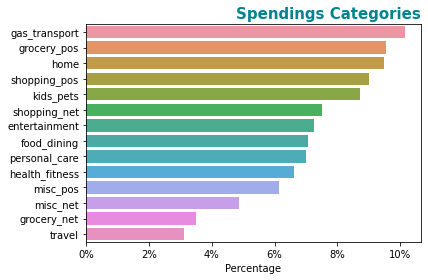

In [18]:
# Plotting 'category'

plt.title("Spendings Categories", loc='right', fontdict={'fontsize': 15, 'fontweight': 'demibold', 'color': '#00858f'})
categories_plt = sns.barplot(x=category_vc, y=category_vc.index)
plt.xlabel("Percentage")
xticks = np.arange(0, 11, 2)
xticklabels = ["{}%".format(i) for i in xticks]
categories_plt.set_xticks(xticks)
categories_plt.set_xticklabels(xticklabels)

plt.show()

From the plot, we can see, that most transactions are in the categories 'gas_transport', 'grocery_pos' and 'home'.

The fewest transactions are in the category 'travel'.

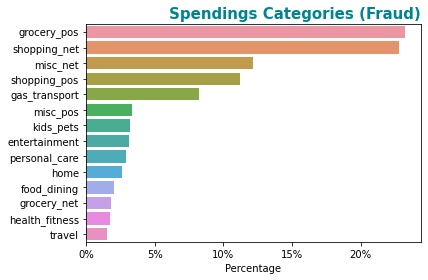

In [19]:
# Plotting categories only for fraudulent transactions

fraud_category_vc = round(train_df_1[train_df_1['is_fraud']==1]['category'].value_counts(normalize=True)*100, 2)

plt.title("Spendings Categories (Fraud)", loc='right', fontdict={'fontsize': 15, 'fontweight': 'demibold', 'color': '#00858f'})
fraud_categories_plt = sns.barplot(x=fraud_category_vc, y=fraud_category_vc.index)
plt.xlabel("Percentage")
xticks = np.arange(0, 21, 5)
xticklabels = ["{}%".format(i) for i in xticks]
fraud_categories_plt.set_xticks(xticks)
fraud_categories_plt.set_xticklabels(xticklabels)

plt.show()

'grocery_pos' is the top category for fraudulent transactions,
'shopping_net' is a close second

In [20]:
# Displaying categories by 'amt'

category_by_amt = train_df_1.groupby(by='category').sum()['amt'].sort_values(ascending=False)
print(category_by_amt)

category
grocery_pos       14460822.38
shopping_pos       9307993.61
shopping_net       8625149.68
gas_transport      8351732.29
home               7173928.11
kids_pets          6503680.16
entertainment      6036678.56
misc_net           5117709.26
misc_pos           5009582.50
food_dining        4672459.44
health_fitness     4653108.02
travel             4516721.68
personal_care      4353450.53
grocery_net        2439412.68
Name: amt, dtype: float64


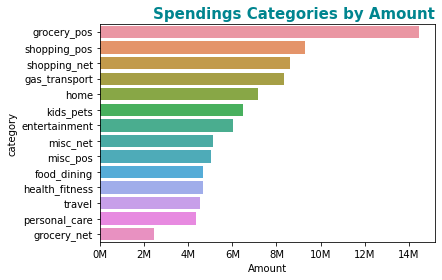

In [21]:
# Plotting categories by 'amt'

plt.title("Spendings Categories by Amount", loc='right', fontdict={'fontsize': 15, 'fontweight': 'demibold', 'color': '#00858f'})
category_by_amt_plt = sns.barplot(x=category_by_amt, y=category_by_amt.index)
plt.xlabel("Amount")
xticks = np.arange(0, 15*10**6, 2*10**6)
xticklabels = ["{}M".format(int(i/10**6)) for i in xticks]
category_by_amt_plt.set_xticks(xticks)
category_by_amt_plt.set_xticklabels(xticklabels)

plt.show()

'grocery_pos' is still at the top of the list.

The least amount of money was spent on 'grocery_net'

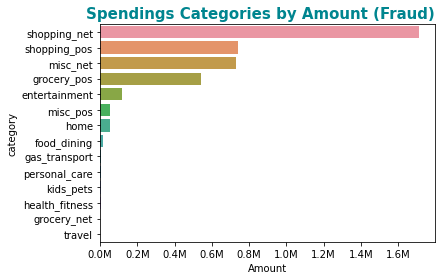

In [22]:
# Plotting categories only for fraudulent transactions

fraud_category_by_amt = train_df_1[train_df_1['is_fraud']==1].groupby(by='category').sum()['amt'].sort_values(ascending=False)
plt.title("Spendings Categories by Amount (Fraud)", loc='right', fontdict={'fontsize': 15, 'fontweight': 'demibold', 'color': '#00858f'})
fraud_category_by_amt_plt = sns.barplot(x=fraud_category_by_amt, y=fraud_category_by_amt.index)
plt.xlabel("Amount")
xticks = np.arange(0, 18*10**5, 2*10**5)
xticklabels = ["{}M".format(i/10**6) for i in xticks]
fraud_category_by_amt_plt.set_xticks(xticks)
fraud_category_by_amt_plt.set_xticklabels(xticklabels)

plt.show()

'shopping_net' is the top category by amount of money among all fraudulent transactions with the amount of 1.7 million.

Considering, that the total spending in this category is 8.6 million, we can see that almost 20% of all money spent in this category is due to fraud!

In [23]:
# Univariate analysis on 'gender'

gender_vc_train = round(train_df_1['gender'].value_counts(normalize=True)*100, 2)
print('Train Gender:')
print(gender_vc_train, '\n')


Train Gender:
F    54.74
M    45.26
Name: gender, dtype: float64 



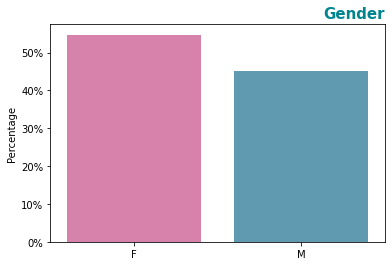

In [24]:
# Plotting 'gender'

plt.title("Gender", loc='right', fontdict={'fontsize': 15, 'fontweight': 'demibold', 'color': '#00858f'})
train_gender_plt = sns.barplot(x=gender_vc_train.index, y=gender_vc_train, palette=["#e574ab", "#52a0be"])
plt.ylabel("Percentage")
yticks = np.arange(0, 51, 10)
yticklabels = ["{}%".format(i) for i in yticks]
train_gender_plt.set_yticks(yticks)
train_gender_plt.set_yticklabels(yticklabels)

plt.show()

Around 55% of all transactions are done by women, and 45% by men

In [174]:
gender_vc_train_fraud = round(train_df[train_df['is_fraud']==1]['gender'].value_counts(normalize=True)*100, 2)
print('Train Gender Fraud:')
print(gender_vc_train_fraud, '\n')

Train Gender Fraud:
M    50.24
F    49.76
Name: gender, dtype: float64 



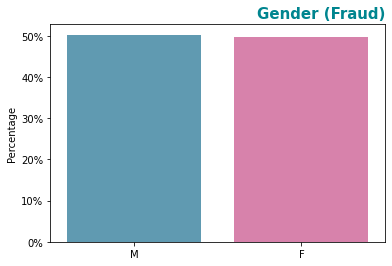

In [176]:
plt.title("Gender (Fraud)", loc='right', fontdict={'fontsize': 15, 'fontweight': 'demibold', 'color': '#00858f'})
train_gender_fraud_plt = sns.barplot(x=gender_vc_train_fraud.index, y=gender_vc_train_fraud, palette=["#52a0be", "#e574ab"])
plt.ylabel("Percentage")
yticks = np.arange(0, 51, 10)
yticklabels = ["{}%".format(i) for i in yticks]
train_gender_fraud_plt.set_yticks(yticks)
train_gender_fraud_plt.set_yticklabels(yticklabels)

plt.show()

The gender for fraudulent transactions is split almost 50/50.

In [25]:
# Displaying number of transactions by state

train_df_1['state'].value_counts()

TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT    11754
AZ    10770
UT    10699
NH     8278
CT     7702
NV     5607
ID     5545
DC     3613
HI     2559
AK     2120
RI      550
DE        9
Name: state, dtype: int64

Most transactions were done in Texas.

In [26]:
# Displaying number of fraudulent transactions by state

train_df_1[train_df_1['is_fraud']==1]['state'].value_counts()

NY    555
TX    479
PA    458
CA    326
OH    321
FL    281
IL    248
MI    238
AL    215
MN    207
VA    198
SC    193
MO    191
NE    180
WI    163
AR    161
MD    157
KS    156
KY    155
OR    149
NC    149
GA    146
WV    146
OK    143
IA    142
IN    142
TN    140
ME    119
NJ    118
MS    115
CO    113
WY    110
WA     96
LA     91
NM     82
SD     74
VT     72
MA     69
UT     61
NH     59
ND     57
NV     47
AZ     37
AK     36
MT     32
DC     21
CT     16
RI     15
ID     11
DE      9
HI      7
Name: state, dtype: int64

Most fraudulent transactions were carried out in New York

#### Univariate analysis on numerical variables

In [27]:
train_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   category       1296675 non-null  object 
 1   amt            1296675 non-null  float64
 2   gender         1296675 non-null  object 
 3   state          1296675 non-null  object 
 4   city_pop       1296675 non-null  int64  
 5   is_fraud       1296675 non-null  int64  
 6   customer_age   1296675 non-null  float64
 7   distance_lat   1296675 non-null  float64
 8   distance_long  1296675 non-null  float64
 9   trans_month    1296675 non-null  int64  
 10  trans_hour     1296675 non-null  int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 108.8+ MB


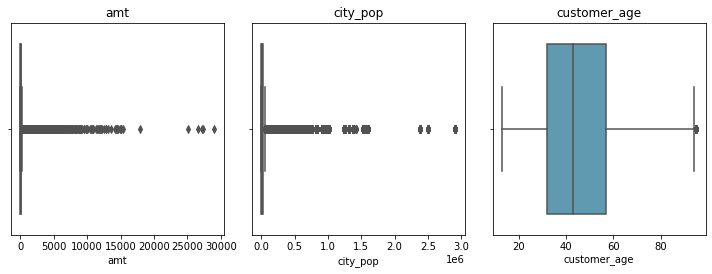

In [28]:
num_cols = ['amt', 'city_pop', 'customer_age']

plt.figure(figsize=(10, 7))
for col in enumerate(num_cols):
    plt.subplot(2, 3, col[0]+1)
    plt.title("{}".format(col[1]))
    sns.boxplot(train_df_1[col[1]], color='#52a0be')

plt.tight_layout()

plt.show()

In [29]:
# Displaying basic statistics for the numerical columns.

num_col_quantiles = [0.25, 0.50, 0.75, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99]
train_df_1[num_cols].describe(percentiles=num_col_quantiles).apply(lambda s: s.apply('{0:.5f}'.format))

amt       city_pop   customer_age
count  1296675.00000  1296675.00000  1296675.00000
mean        70.35104    88824.44056       45.49741
std        160.31604   301956.36069       17.39731
min          1.00000       23.00000       13.00000
25%          9.65000      743.00000       32.00000
50%         47.52000     2456.00000       43.00000
75%         83.14000    20328.00000       57.00000
90%        136.67000   186140.00000       70.00000
95%        196.31000   525713.00000       79.00000
96%        214.46000   687276.00000       82.00000
97%        248.06780   910148.00000       84.00000
98%        337.98000  1263321.00000       88.00000
99%        545.99260  1577385.00000       91.00000
max      28948.90000  2906700.00000       95.00000

We can definitely see some outliers in 'amt' and 'city_pop'.

However, some of them might be helpful, as they might be an indicator of a non-fraudulent transaction (in case of 'amt')

#### Univariate analysis on date-time features

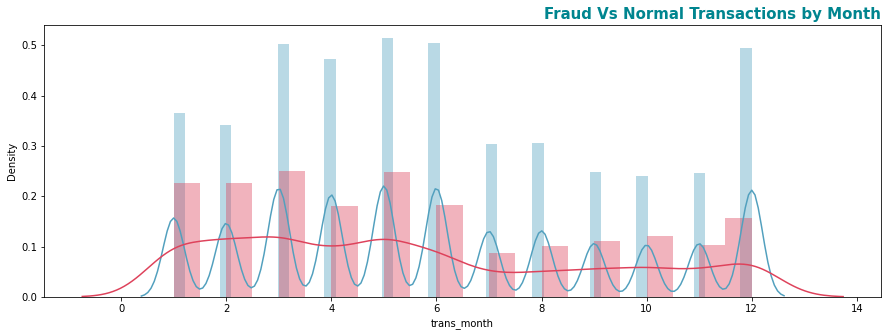

In [30]:
# Plotting fraud vs non-fraud transactions by month

plt.figure(figsize=(15,5))
plt.title('Fraud Vs Normal Transactions by Month', loc='right', fontdict={'fontsize': 15, 'fontweight': 'demibold', 'color': '#00858f'})
sns.distplot(train_df_1[train_df_1['is_fraud']==0]["trans_month"], color='#52a0be')
sns.distplot(train_df_1[train_df_1['is_fraud']==1]["trans_month"], color='#de425b')
plt.show()

There are more fraudulent transactions in September than in August and in October than in September.

Even though, the number of non-fraudulent transactions has a different dynamic.

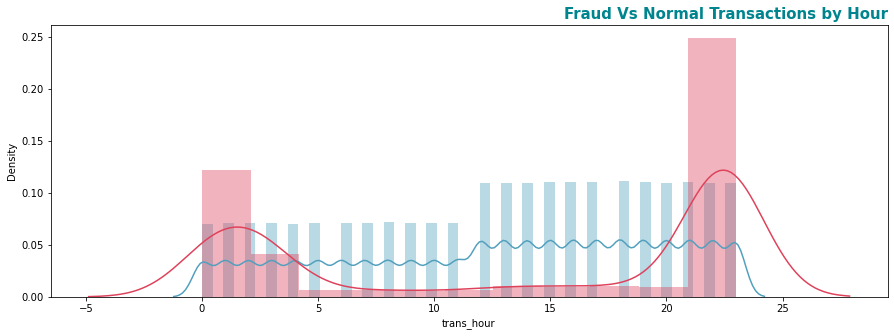

In [31]:
# Plotting fraud vs non-fraud transactions by hour

plt.figure(figsize=(15,5))
plt.title('Fraud Vs Normal Transactions by Hour', loc='right', fontdict={'fontsize': 15, 'fontweight': 'demibold', 'color': '#00858f'})
sns.distplot(train_df_1[train_df_1['is_fraud']==0]["trans_hour"], color='#52a0be')
sns.distplot(train_df_1[train_df_1['is_fraud']==1]["trans_hour"], color='#de425b')
plt.show()

The peak activity time for fraudulent transactions is from 9PM to 2AM.

In [32]:
# Dropping 'state' in train_df_1

train_df_1 = train_df_1.drop('state', axis=1)
train_df_1.head()

category     amt gender  city_pop  is_fraud  customer_age  \
0       misc_net    4.97      F      3495         0          30.0   
1    grocery_pos  107.23      F       149         0          40.0   
2  entertainment  220.11      M      4154         0          56.0   
3  gas_transport   45.00      M      1939         0          51.0   
4       misc_pos   41.96      M        99         0          32.0   

   distance_lat  distance_long  trans_month  trans_hour  
0      0.067507       0.870215            1           0  
1      0.271247       0.024038            1           0  
2      0.969904       0.107519            1           0  
3      0.803731       0.447271            1           0  
4      0.254299       0.830441            1           0

In [33]:
# Dropping 'state' in test_df_1

test_df_1 = test_df_1.drop('state', axis=1)
test_df_1.head()

category    amt gender  city_pop  is_fraud  customer_age  \
0   personal_care   2.86      M    333497         0          52.0   
1   personal_care  29.84      F       302         0          30.0   
2  health_fitness  41.28      F     34496         0          49.0   
3        misc_pos  60.05      M     54767         0          32.0   
4          travel   3.19      M      1126         0          64.0   

   distance_lat  distance_long  trans_month  trans_hour  
0      0.020491       0.265214            6          12  
1      0.870202       0.475569            6          12  
2      0.177090       0.659611            6          12  
3      0.242698       0.063961            6          12  
4      0.706248       0.867734            6          12

In [34]:
# Mapping gender to 0s and 1s in train_df_1

def binary_map(x):
    return x.map({'F': 0, 'M':1})

train_df_1[['gender']] = train_df_1[['gender']].apply(binary_map)
train_df_1.head()

category     amt  gender  city_pop  is_fraud  customer_age  \
0       misc_net    4.97       0      3495         0          30.0   
1    grocery_pos  107.23       0       149         0          40.0   
2  entertainment  220.11       1      4154         0          56.0   
3  gas_transport   45.00       1      1939         0          51.0   
4       misc_pos   41.96       1        99         0          32.0   

   distance_lat  distance_long  trans_month  trans_hour  
0      0.067507       0.870215            1           0  
1      0.271247       0.024038            1           0  
2      0.969904       0.107519            1           0  
3      0.803731       0.447271            1           0  
4      0.254299       0.830441            1           0

In [35]:
# Mapping gender to 0s and 1s in test_df_1

test_df_1[['gender']] = test_df_1[['gender']].apply(binary_map)
test_df_1.head()

category    amt  gender  city_pop  is_fraud  customer_age  \
0   personal_care   2.86       1    333497         0          52.0   
1   personal_care  29.84       0       302         0          30.0   
2  health_fitness  41.28       0     34496         0          49.0   
3        misc_pos  60.05       1     54767         0          32.0   
4          travel   3.19       1      1126         0          64.0   

   distance_lat  distance_long  trans_month  trans_hour  
0      0.020491       0.265214            6          12  
1      0.870202       0.475569            6          12  
2      0.177090       0.659611            6          12  
3      0.242698       0.063961            6          12  
4      0.706248       0.867734            6          12

In [36]:
# Creating dummy variables for 'category' in Train DF

train_df_2 = pd.get_dummies(train_df_1, columns=['category'], prefix='category', drop_first=True)
train_df_2.columns

Index(['amt', 'gender', 'city_pop', 'is_fraud', 'customer_age', 'distance_lat',
       'distance_long', 'trans_month', 'trans_hour', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel'],
      dtype='object')

In [37]:
# Creating dummy variables for 'category' in Test DF

test_df_2 = pd.get_dummies(test_df_1, columns=['category'], prefix='category', drop_first=True)
test_df_2.columns

Index(['amt', 'gender', 'city_pop', 'is_fraud', 'customer_age', 'distance_lat',
       'distance_long', 'trans_month', 'trans_hour', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel'],
      dtype='object')

## Building a Logistic Regression Model with Class Imbalance

In [38]:
# Importing train_test_split for creating a validation set

from sklearn.model_selection import train_test_split

In [39]:
# Creating X and y for train dataset

X_train_df_logreg = train_df_2.drop('is_fraud', axis=1)
y_train_df_logreg = train_df_2['is_fraud']
print(y_train_df_logreg.head())
X_train_df_logreg.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64


amt  gender  city_pop  customer_age  distance_lat  distance_long  \
0    4.97       0      3495          30.0      0.067507       0.870215   
1  107.23       0       149          40.0      0.271247       0.024038   
2  220.11       1      4154          56.0      0.969904       0.107519   
3   45.00       1      1939          51.0      0.803731       0.447271   
4   41.96       1        99          32.0      0.254299       0.830441   

   trans_month  trans_hour  category_food_dining  category_gas_transport  \
0            1           0                     0                       0   
1            1           0                     0                       0   
2            1           0                     0                       0   
3            1           0                     0                       1   
4            1           0                     0                       0   

   category_grocery_net  category_grocery_pos  category_health_fitness  \
0                     0                     0                        0   
1                     0                     1                        0   
2                     0                     0                        0   
3                     0                     0                        0   
4                     0                     0                        0   

   category_home  category_kids_pets  category_misc_net  category_misc_pos  \
0              0                   0                  1                  0   
1              0                   0                  0                  0   
2              0                   0                  0                  0   
3              0                   0                  0                  0   
4              0                   0                  0                  1   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   

   category_travel  
0                0  
1                0  
2                0  
3                0  
4                0

In [40]:
# Splitting X_train_df and y_train_df into train and val

X_train_logreg_1, X_val_logreg_1, y_train_logreg_1, y_val_logreg_1 = train_test_split(X_train_df_logreg, y_train_df_logreg, stratify=y_train_df_logreg, train_size=0.7, random_state=72)
print(X_train_logreg_1.shape)
print(y_train_logreg_1.shape)
print(X_val_logreg_1.shape)
print(y_val_logreg_1.shape)

(907672, 21)
(907672,)
(389003, 21)
(389003,)


In [41]:
# Feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaling_cols = ['amt', 'city_pop', 'customer_age', 'trans_month', 'trans_hour']

X_train_logreg_1[scaling_cols] = scaler.fit_transform(X_train_logreg_1[scaling_cols])
X_train_logreg_1.head()

amt  gender  city_pop  customer_age  distance_lat  distance_long  \
880215 -0.113837       0 -0.292990      1.005743      0.769946       0.544290   
918829 -0.394568       1 -0.185641     -0.775666      0.280553       0.145729   
925679 -0.376089       0 -0.286581     -0.775666      0.232492       0.034135   
675864 -0.355868       0 -0.293526     -0.028624      0.301390       0.287044   
632342 -0.011487       0 -0.292283      0.775883      0.196392       0.830043   

        trans_month  trans_hour  category_food_dining  category_gas_transport  \
880215     1.714815   -0.558215                     0                       1   
918829     1.714815    0.028424                     0                       0   
925679    -1.503508    0.468403                     0                       0   
675864     1.129665    1.055043                     0                       0   
632342     0.837091   -0.998195                     0                       1   

        category_grocery_net  category_grocery_pos  category_health_fitness  \
880215                     0                     0                        0   
918829                     0                     0                        0   
925679                     0                     0                        0   
675864                     0                     0                        0   
632342                     0                     0                        0   

        category_home  category_kids_pets  category_misc_net  \
880215              0                   0                  0   
918829              0                   0                  0   
925679              0                   0                  0   
675864              0                   0                  0   
632342              0                   0                  0   

        category_misc_pos  category_personal_care  category_shopping_net  \
880215                  0                       0                      0   
918829                  0                       0                      1   
925679                  0                       0                      0   
675864                  0                       0                      0   
632342                  0                       0                      0   

        category_shopping_pos  category_travel  
880215                      0                0  
918829                      0                0  
925679                      1                0  
675864                      0                1  
632342                      0                0

In [42]:
# Choosing variables via RFE

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=12)
rfe = rfe.fit(X_train_logreg_1, y_train_logreg_1)

list(zip(X_train_logreg_1.columns, rfe.support_, rfe.ranking_))

[('amt', True, 1),
 ('gender', False, 3),
 ('city_pop', False, 10),
 ('customer_age', False, 2),
 ('distance_lat', False, 8),
 ('distance_long', False, 9),
 ('trans_month', False, 7),
 ('trans_hour', True, 1),
 ('category_food_dining', False, 4),
 ('category_gas_transport', True, 1),
 ('category_grocery_net', True, 1),
 ('category_grocery_pos', True, 1),
 ('category_health_fitness', True, 1),
 ('category_home', True, 1),
 ('category_kids_pets', False, 5),
 ('category_misc_net', True, 1),
 ('category_misc_pos', True, 1),
 ('category_personal_care', False, 6),
 ('category_shopping_net', True, 1),
 ('category_shopping_pos', True, 1),
 ('category_travel', True, 1)]

In [43]:
col = X_train_logreg_1.columns[rfe.support_]
col

Index(['amt', 'trans_hour', 'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_misc_net', 'category_misc_pos', 'category_shopping_net',
       'category_shopping_pos', 'category_travel'],
      dtype='object')

In [44]:
# Building a model with the features chosen by RFE

import statsmodels.api as sm

X_train_logreg_1_sm = sm.add_constant(X_train_logreg_1[col])
logm1 = sm.GLM(y_train_logreg_1, X_train_logreg_1_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_fraud   No. Observations:               907672
Model:                            GLM   Df Residuals:                   907659
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26094.
Date:                Mon, 19 Jun 2023   Deviance:                       52189.
Time:                        12:28:42   Pearson chi2:                 2.25e+16
No. Iterations:                    12   Pseudo R-squ. (CS):            0.01360
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -6.6940      0.044   -150.525      0.000      -6.781      -6.607
amt                         0.4426      0.006     68.686      0.000       0.430       0.455
trans_hour                  0.8188      0.020     41.571      0.000       0.780       0.857
category_gas_transport      2.1485      0.072     29.824      0.000       2.007       2.290
category_grocery_net        1.7219      0.116     14.866      0.000       1.495       1.949
category_grocery_pos        3.0325      0.060     50.947      0.000       2.916       3.149
category_health_fitness    -0.4335      0.114     -3.810      0.000      -0.656      -0.210
category_home              -0.3865      0.095     -4.050      0.000      -0.574      -0.199
category_misc_net           2.4801      0.061     40.569      0.000       2.360       2.600
category_misc_pos           0.6896      0.088      7.798      0.000       0.516       0.863
category_shopping_net       1.8886      0.054     34.899      0.000       1.783       1.995
category_shopping_pos       0.8250      0.065     12.604      0.000       0.697       0.953
category_travel            -6.3447      0.376    -16.892      0.000      -7.081      -5.609
===========================================================================================
"""

All p-values are less than 0.05 which is great.

Let us look at Variance Inflation actor.

In [45]:
# Displaying the VIF of all the features

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_logreg_1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_logreg_1[col].values, i) for i in range(X_train_logreg_1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

Features   VIF
1                trans_hour  1.63
2    category_gas_transport  1.19
4      category_grocery_pos  1.18
3      category_grocery_net  1.07
6             category_home  1.07
5   category_health_fitness  1.05
7         category_misc_net  1.04
11          category_travel  1.03
0                       amt  1.01
8         category_misc_pos  1.01
9     category_shopping_net  1.00
10    category_shopping_pos  1.00

The VIF of all the features is much less than 5.
It is time to make predictions and evaluate the model.

In [46]:
# Making predictions on the train data

y_train_logreg_1_pred = res.predict(X_train_logreg_1_sm)
y_train_logreg_1_pred = y_train_logreg_1_pred.values.reshape(-1)
y_train_logreg_1_pred

array([0.00634957, 0.00698639, 0.0034981 , ..., 0.01795128, 0.00689508,
       0.00249788])

In [47]:
y_train_logreg_1_pred_final = pd.DataFrame({'Index': y_train_logreg_1.index,
                                   'Fraud': y_train_logreg_1.values,
                                   'Probability': y_train_logreg_1_pred})
y_train_logreg_1_pred_final.head()

Index  Fraud  Probability
0  880215      0     0.006350
1  918829      0     0.006986
2  925679      0     0.003498
3  675864      0     0.000004
4  632342      0     0.004642

In [48]:
y_train_logreg_1_pred_final['Predicted'] = y_train_logreg_1_pred_final['Probability'].map(lambda x: 1 if x>=0.5 else 0)
y_train_logreg_1_pred_final.head(10)

Index  Fraud  Probability  Predicted
0   880215      0     0.006350          0
1   918829      0     0.006986          0
2   925679      0     0.003498          0
3   675864      0     0.000004          0
4   632342      0     0.004642          0
5  1290486      0     0.003762          0
6   296718      0     0.001574          0
7  1076068      0     0.009139          0
8     2044      0     0.004933          0
9  1141866      0     0.005220          0

In [49]:
# Printing the confusion matrix

from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_logreg_1_pred_final['Fraud'], y_train_logreg_1_pred_final['Predicted'])
print(confusion)

[[901961    457]
 [  5254      0]]


In [50]:
# Printing the accuracy of the model

print(metrics.accuracy_score(y_train_logreg_1_pred_final['Fraud'], y_train_logreg_1_pred_final['Predicted']))

0.9937080795705938


Although the accuracy score is ~99.4, we cannot trust it as accuracy is not a good evaluation metric of the model trained on the data with class imbalance.

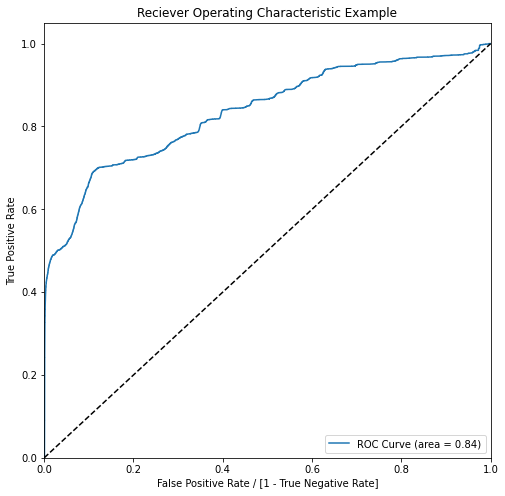

In [51]:
# Drawing the ROC curve

def draw_roc(actual, probs):
    fpr, tpr, threshholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate / [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever Operating Characteristic Example')
    plt.legend(loc='lower right')
    plt.show()

    return None

draw_roc(y_train_logreg_1_pred_final['Fraud'], y_train_logreg_1_pred_final['Probability'] )

The AUC is 0.84, which is a poor score.

The next thing to try is getting rid of the class imbalance.

## Building a Logistic Regression Model with Balanced Classes

In [52]:
# Splitting X_train_df and y_train_df into train and val

X_train_logreg_2, X_val_logreg_2, y_train_logreg_2, y_val_logreg_2 = train_test_split(X_train_df_logreg, y_train_df_logreg, stratify=y_train_df_logreg, train_size=0.7, random_state=72)
print(X_train_logreg_2.shape)
print(y_train_logreg_2.shape)
print(X_val_logreg_2.shape)
print(y_val_logreg_2.shape)

(907672, 21)
(907672,)
(389003, 21)
(389003,)


In [53]:
# Importing SMOTE

from imblearn.over_sampling import SMOTE

# Using smote to oversample the data

smote = SMOTE()
X_train_logreg_2_smote, y_train_logreg_2_smote = smote.fit_resample(X_train_logreg_2, y_train_logreg_2)

# Checking the class imbalance

print('Original y_train_logreg_2:')
print(y_train_logreg_2.value_counts(normalize=True), '\n')
print('SMOTE y_train_logreg_2:')
print(y_train_logreg_2_smote.value_counts(normalize=True), '\n')

Original y_train_logreg_2:
0    0.994212
1    0.005788
Name: is_fraud, dtype: float64 

SMOTE y_train_logreg_2:
0    0.5
1    0.5
Name: is_fraud, dtype: float64 



The classes are perfectly balanced now.

Let us build another Logistic Regression Model with balanced classes.

In [54]:
# Feature scaling

X_train_logreg_2_smote[scaling_cols] = scaler.fit_transform(X_train_logreg_2_smote[scaling_cols])
X_train_logreg_2_smote.head()

amt  gender  city_pop  customer_age  distance_lat  distance_long  \
0 -0.661685       0 -0.293589      0.933752      0.769946       0.544290   
1 -0.782243       1 -0.191777     -0.861314      0.280553       0.145729   
2 -0.774307       0 -0.287510     -0.861314      0.232492       0.034135   
3 -0.765623       0 -0.294097     -0.108544      0.301390       0.287044   
4 -0.617731       0 -0.292918      0.702131      0.196392       0.830043   

   trans_month  trans_hour  category_food_dining  category_gas_transport  \
0     1.933697   -0.533877                     0                       1   
1     1.933697   -0.023917                     0                       0   
2    -1.440160    0.358553                     0                       0   
3     1.320268    0.868513                     0                       0   
4     1.013554   -0.916347                     0                       1   

   category_grocery_net  category_grocery_pos  category_health_fitness  \
0                     0                     0                        0   
1                     0                     0                        0   
2                     0                     0                        0   
3                     0                     0                        0   
4                     0                     0                        0   

   category_home  category_kids_pets  category_misc_net  category_misc_pos  \
0              0                   0                  0                  0   
1              0                   0                  0                  0   
2              0                   0                  0                  0   
3              0                   0                  0                  0   
4              0                   0                  0                  0   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       0                      0                      0   
1                       0                      1                      0   
2                       0                      0                      1   
3                       0                      0                      0   
4                       0                      0                      0   

   category_travel  
0                0  
1                0  
2                0  
3                1  
4                0

In [55]:
# Choosing variables via RFE

logreg2 = LogisticRegression()
rfe2 = RFE(logreg2, n_features_to_select=12)
rfe2 = rfe2.fit(X_train_logreg_2_smote, y_train_logreg_2_smote)

list(zip(X_train_logreg_2_smote.columns, rfe2.support_, rfe2.ranking_))

[('amt', True, 1),
 ('gender', False, 4),
 ('city_pop', False, 8),
 ('customer_age', False, 9),
 ('distance_lat', False, 10),
 ('distance_long', False, 6),
 ('trans_month', False, 5),
 ('trans_hour', False, 7),
 ('category_food_dining', True, 1),
 ('category_gas_transport', False, 3),
 ('category_grocery_net', True, 1),
 ('category_grocery_pos', False, 2),
 ('category_health_fitness', True, 1),
 ('category_home', True, 1),
 ('category_kids_pets', True, 1),
 ('category_misc_net', True, 1),
 ('category_misc_pos', True, 1),
 ('category_personal_care', True, 1),
 ('category_shopping_net', True, 1),
 ('category_shopping_pos', True, 1),
 ('category_travel', True, 1)]

In [56]:
col = X_train_logreg_2_smote.columns[rfe2.support_]
col

Index(['amt', 'category_food_dining', 'category_grocery_net',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel'],
      dtype='object')

In [57]:
# Building a model with the features chosen by RFE

X_train_logreg_2_smote_sm = sm.add_constant(X_train_logreg_2_smote[col])
logm1 = sm.GLM(y_train_logreg_2_smote, X_train_logreg_2_smote_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_fraud   No. Observations:              1804836
Model:                            GLM   Df Residuals:                  1804823
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.5311e+05
Date:                Mon, 19 Jun 2023   Deviance:                   1.1062e+06
Time:                        12:30:59   Pearson chi2:                 4.34e+17
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5385
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.9622      0.004    461.212      0.000       1.954       1.970
amt                         3.0456      0.006    491.056      0.000       3.033       3.058
category_food_dining       -2.0700      0.012   -173.665      0.000      -2.093      -2.047
category_grocery_net       -2.6311      0.022   -117.808      0.000      -2.675      -2.587
category_health_fitness    -3.4355      0.023   -149.803      0.000      -3.480      -3.391
category_home              -2.5925      0.012   -217.323      0.000      -2.616      -2.569
category_kids_pets         -2.5382      0.013   -190.226      0.000      -2.564      -2.512
category_misc_net          -3.1698      0.016   -196.238      0.000      -3.201      -3.138
category_misc_pos          -3.1848      0.020   -159.404      0.000      -3.224      -3.146
category_personal_care     -2.4911      0.015   -166.321      0.000      -2.520      -2.462
category_shopping_net      -3.8576      0.018   -219.387      0.000      -3.892      -3.823
category_shopping_pos      -4.3155      0.018   -242.321      0.000      -4.350      -4.281
category_travel            -4.7966      0.038   -127.422      0.000      -4.870      -4.723
===========================================================================================
"""

In [58]:
# Displaying the VIF of all the features

vif = pd.DataFrame()
vif['Features'] = X_train_logreg_2_smote_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_logreg_2_smote[col].values, i) for i in range(X_train_logreg_2_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

Features   VIF
0                       amt  1.34
9     category_shopping_net  1.18
4             category_home  1.03
5        category_kids_pets  1.03
1      category_food_dining  1.02
3   category_health_fitness  1.02
7         category_misc_pos  1.02
8    category_personal_care  1.02
2      category_grocery_net  1.01
6         category_misc_net  1.01
11          category_travel  1.01
10    category_shopping_pos  1.00

In [59]:
# Making predictions

y_train_logreg_2_smote_pred = res.predict(X_train_logreg_2_smote_sm)
y_train_logreg_2_smote_pred = y_train_logreg_2_smote_pred.values.reshape(-1)
y_train_logreg_2_smote_pred

array([0.48673702, 0.01368251, 0.00891047, ..., 0.40401325, 0.97334273,
       0.46139772])

In [60]:
y_train_logreg_2_smote_pred_final = pd.DataFrame({'Index': y_train_logreg_2_smote.index,
                                   'Fraud': y_train_logreg_2_smote.values,
                                   'Probability': y_train_logreg_2_smote_pred})
y_train_logreg_2_smote_pred_final.head()

Index  Fraud  Probability
0      0      0     0.486737
1      1      0     0.013683
2      2      0     0.008910
3      3      0     0.005674
4      4      0     0.520189

In [61]:
y_train_logreg_2_smote_pred_final['Predicted'] = y_train_logreg_2_smote_pred_final['Probability'].map(lambda x: 1 if x>=0.5 else 0)
y_train_logreg_2_smote_pred_final.head(10)

Index  Fraud  Probability  Predicted
0      0      0     0.486737          0
1      1      0     0.013683          0
2      2      0     0.008910          0
3      3      0     0.005674          0
4      4      0     0.520189          1
5      5      0     0.059257          0
6      6      0     0.076958          0
7      7      0     0.548186          1
8      8      0     0.027117          0
9      9      0     0.044885          0

In [62]:
# Printing the confusion matrix

confusion = metrics.confusion_matrix(y_train_logreg_2_smote_pred_final['Fraud'], y_train_logreg_2_smote_pred_final['Predicted'])
print(confusion)

[[732988 169430]
 [198788 703630]]


In [63]:
# Printing the accuracy of the model

print(metrics.accuracy_score(y_train_logreg_2_smote_pred_final['Fraud'], y_train_logreg_2_smote_pred_final['Predicted']))

0.7959825712696333


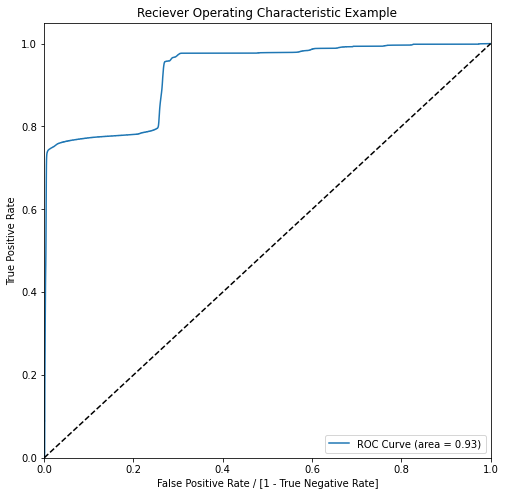

In [64]:
# Drawing the ROC curve

draw_roc(y_train_logreg_2_smote_pred_final['Fraud'], y_train_logreg_2_smote_pred_final['Probability'])

The AUC for Logistic Regression with balanced classes is 0.93,

which is much better than 0.84 for the previous model with unbalanced classes.

However, we should try some other models and see how they do.

## Decision Tree with Balanced Classes

In [65]:
# Creating X and y

X_train_df_dt = train_df_2.drop('is_fraud', axis=1)
y_train_df_dt = train_df_2['is_fraud']
print(y_train_df_dt.head())
X_train_df_dt.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64


amt  gender  city_pop  customer_age  distance_lat  distance_long  \
0    4.97       0      3495          30.0      0.067507       0.870215   
1  107.23       0       149          40.0      0.271247       0.024038   
2  220.11       1      4154          56.0      0.969904       0.107519   
3   45.00       1      1939          51.0      0.803731       0.447271   
4   41.96       1        99          32.0      0.254299       0.830441   

   trans_month  trans_hour  category_food_dining  category_gas_transport  \
0            1           0                     0                       0   
1            1           0                     0                       0   
2            1           0                     0                       0   
3            1           0                     0                       1   
4            1           0                     0                       0   

   category_grocery_net  category_grocery_pos  category_health_fitness  \
0                     0                     0                        0   
1                     0                     1                        0   
2                     0                     0                        0   
3                     0                     0                        0   
4                     0                     0                        0   

   category_home  category_kids_pets  category_misc_net  category_misc_pos  \
0              0                   0                  1                  0   
1              0                   0                  0                  0   
2              0                   0                  0                  0   
3              0                   0                  0                  0   
4              0                   0                  0                  1   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   

   category_travel  
0                0  
1                0  
2                0  
3                0  
4                0

In [66]:
# Splitting X_train_df and y_train_df into train and val

X_train_dt, X_val_dt, y_train_dt, y_val_dt = train_test_split(X_train_df_dt, y_train_df_dt, stratify=y_train_df_logreg, train_size=0.7, random_state=72)
print(X_train_dt.shape)
print(y_train_dt.shape)
print(X_val_dt.shape)
print(y_val_dt.shape)

(907672, 21)
(907672,)
(389003, 21)
(389003,)


In [67]:
# Using SMOTE to deal with class imbalance

smote = SMOTE()

X_train_dt_smote, y_train_dt_smote = smote.fit_resample(X_train_dt, y_train_dt)

# Checking the class imbalance

print('Original y_train_dt:')
print(y_train_dt.value_counts(normalize=True), '\n')
print('SMOTE y_train_dt_smote:')
print(y_train_dt_smote.value_counts(normalize=True), '\n')

Original y_train_dt:
0    0.994212
1    0.005788
Name: is_fraud, dtype: float64 

SMOTE y_train_dt_smote:
0    0.5
1    0.5
Name: is_fraud, dtype: float64 



In [68]:
# Importing functions for Decision Tree Model

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from io import StringIO
import pydotplus, graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score,roc_auc_score

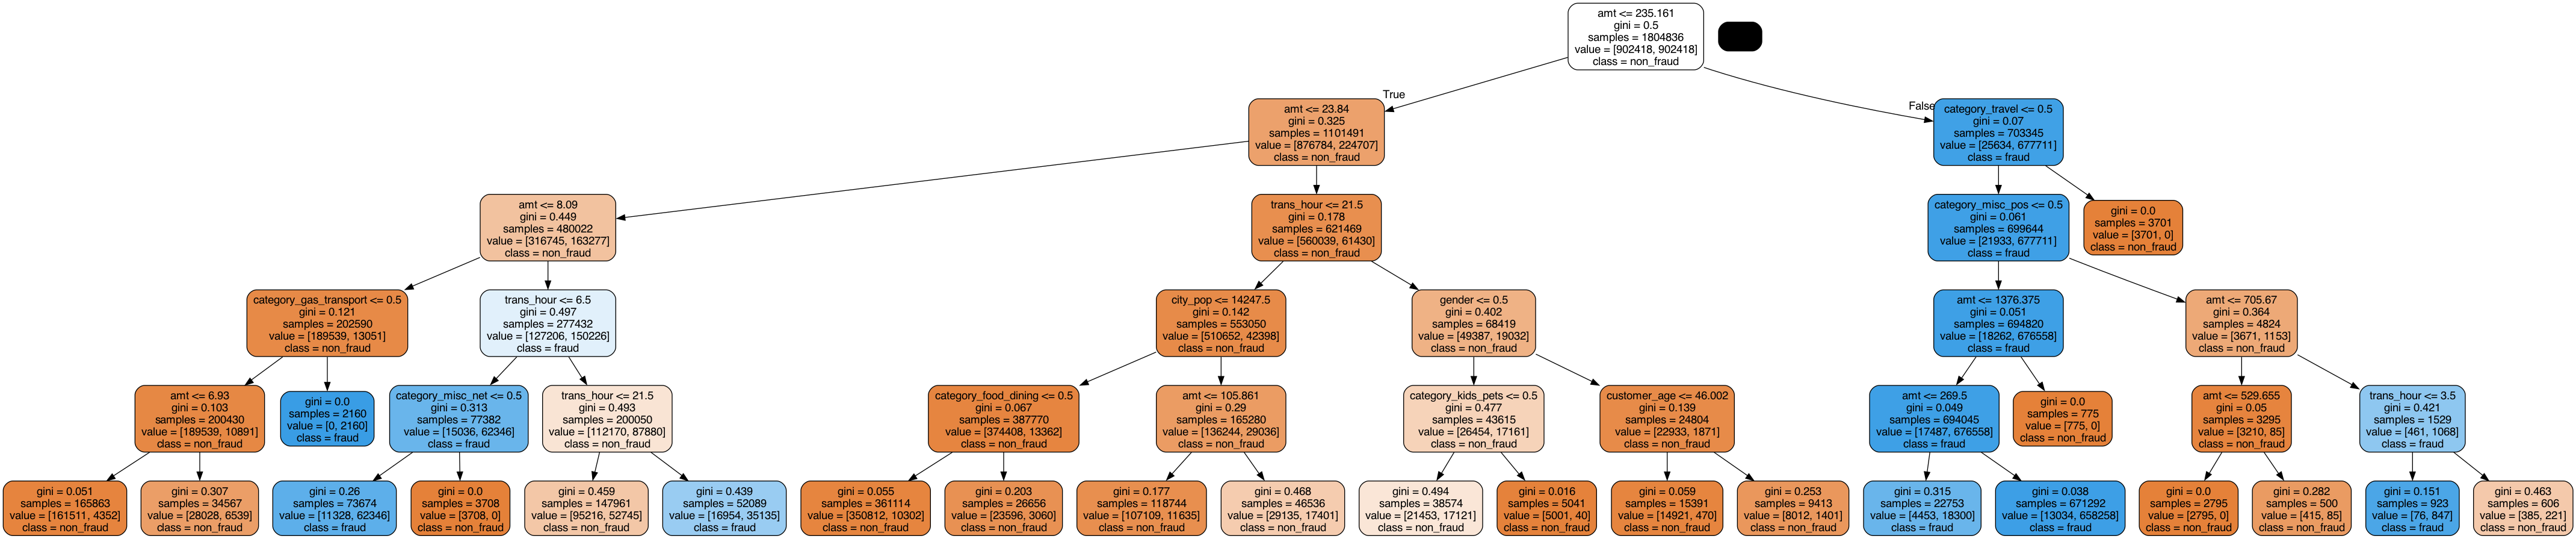

In [69]:
# Building a Decision Tree with random hyperparameters

dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=500, random_state=72)
dt.fit(X_train_dt_smote, y_train_dt_smote)

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train_dt_smote.columns, class_names=['non_fraud', 'fraud'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [70]:
# Making predictions on train data

y_train_dt_pred = dt.predict(X_train_dt_smote)

In [71]:
# Scores for train data

print('AUC:', roc_auc_score(y_train_dt_smote, y_train_dt_pred))
print('Accuracy:', accuracy_score(y_train_dt_smote, y_train_dt_pred))
print('Recall:', recall_score(y_train_dt_smote, y_train_dt_pred))
print('Precision:', precision_score(y_train_dt_smote, y_train_dt_pred))

AUC: 0.9051343169130048
Accuracy: 0.9051343169130048
Recall: 0.8610710336008368
Precision: 0.944287882599275


## Decision Tree with Balanced Classes Using Grid Search CV

In [72]:
# Initiating grid search

dt = DecisionTreeClassifier(random_state=72)

params_dt = {
    'max_depth': [x for x in range(5, 10)], 
    'min_samples_leaf': [x for x in range(100, 1000, 100)]
}

grid_search_1 = GridSearchCV(estimator=dt, param_grid=params_dt,
                             cv=4, n_jobs=-1, verbose=1,
                             scoring='roc_auc')

grid_search_1.fit(X_train_dt_smote, y_train_dt_smote)

Fitting 4 folds for each of 45 candidates, totalling 180 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=72), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9],
                         'min_samples_leaf': [100, 200, 300, 400, 500, 600, 700,
                                              800, 900]},
             scoring='roc_auc', verbose=1)

In [73]:
grid_search_1.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=400, random_state=72)

In [74]:
grid_search_1.best_score_

0.9855133424638158

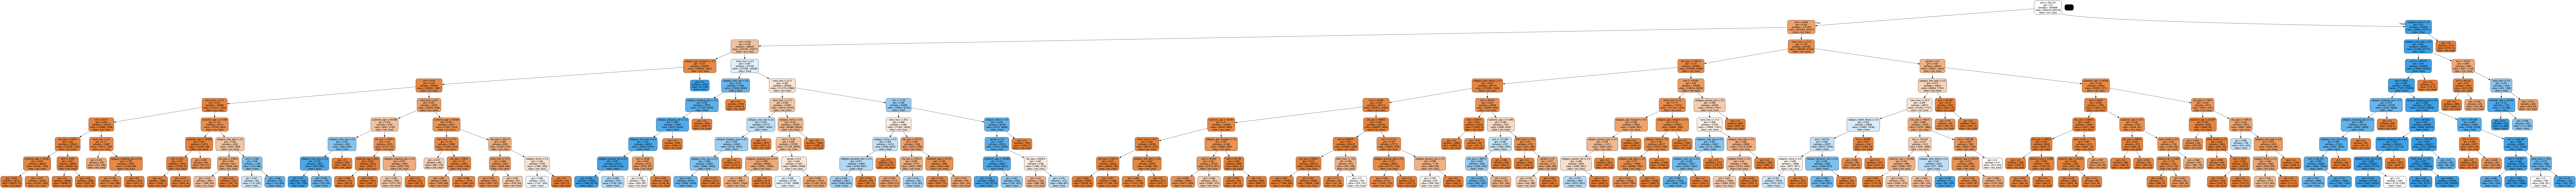

In [75]:
dt_best = grid_search_1.best_estimator_

dt_best.fit(X_train_dt_smote, y_train_dt_smote)
dot_data = StringIO()

export_graphviz(dt_best, out_file=dot_data, filled=True, rounded=True, 
                feature_names=X_train_dt_smote.columns, class_names=['non_fraud', 'fraud'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [76]:
y_train_dt_pred_vc = dt_best.predict(X_train_dt_smote)

print('AUC:', roc_auc_score(y_train_dt_smote, y_train_dt_pred_vc))
print('Accuracy"', accuracy_score(y_train_dt_smote, y_train_dt_pred_vc))
print('Recall:', recall_score(y_train_dt_smote, y_train_dt_pred_vc))
print('Precision:', precision_score(y_train_dt_smote, y_train_dt_pred_vc))

AUC: 0.9385728121557859
Accuracy" 0.9385728121557859
Recall: 0.9397762455979379
Precision: 0.9375197603334107


Let us see how this Decision Tree will do on the validation data

In [77]:
y_val_dt_pred_vc = dt_best.predict(X_val_dt)

print('AUC:', roc_auc_score(y_val_dt, y_val_dt_pred_vc))
print('Accuracy"', accuracy_score(y_val_dt, y_val_dt_pred_vc))
print('Recall:', recall_score(y_val_dt, y_val_dt_pred_vc))
print('Precision:', precision_score(y_val_dt, y_val_dt_pred_vc))

AUC: 0.9358653348786752
Accuracy" 0.9369927738346491
Recall: 0.9347246891651865
Precision: 0.07952999848874112


The AUC of ~0.94 on the test data and 0.936 on the val data is not a bad score, although it is not ideal.

Let us see the performance of a Random Forest

## Random Forest with Balanced Classes

In [78]:
# Copying the train_smote and val data

X_train_rf_smote = X_train_dt_smote.copy()
y_train_rf_smote = y_train_dt_smote.copy()
X_val_rf = X_val_dt.copy()
y_val_rf = y_val_dt.copy()

In [79]:
# Importing Random Forest Classifier and
# Initiating a Random Forest Model with the hyperparameters from the previous Grid Search CV

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=9, min_samples_leaf=400, random_state=72, 
                            n_estimators=10, max_features=13, oob_score=True)
rf.fit(X_train_rf_smote, y_train_rf_smote)

RandomForestClassifier(max_depth=9, max_features=13, min_samples_leaf=400,
                       n_estimators=10, oob_score=True, random_state=72)

In [80]:
# Checking the OOB Score

rf.oob_score_

0.9387606408560113

In [81]:
# Checking the performance of the random forest on the train data

y_train_rf_pred = rf.predict(X_train_rf_smote)

print('AUC:', roc_auc_score(y_train_rf_smote, y_train_rf_pred))
print('Accuracy"', accuracy_score(y_train_rf_smote, y_train_rf_pred))
print('Recall:', recall_score(y_train_rf_smote, y_train_rf_pred))
print('Precision:', precision_score(y_train_rf_smote, y_train_rf_pred))

AUC: 0.9493782260548881
Accuracy" 0.9493782260548881
Recall: 0.9394803738400608
Precision: 0.9584536387829347


In [82]:
# Checking the performance of the random forest on the val data

y_val_rf_pred = rf.predict(X_val_rf)

print('AUC:', roc_auc_score(y_val_rf, y_val_rf_pred))
print('Accuracy"', accuracy_score(y_val_rf, y_val_rf_pred))
print('Recall:', recall_score(y_val_rf, y_val_rf_pred))
print('Precision:', precision_score(y_val_rf, y_val_rf_pred))

AUC: 0.9405199744294149
Accuracy" 0.9585375948257469
Recall: 0.922291296625222
Precision: 0.11519050524097388


The AUC of ~0.95 on train data and 0.94 on the validation data is good for a random forest with almost random hyperparameters. We can improve our model with some hyperparameter tuning

## Random Forest with Balanced Classes Using Grid Search CV

In [94]:
# Initializing a random forest with Grid Search CV

classifier_rf = RandomForestClassifier(random_state=72, n_jobs=-1, oob_score=True)

params_rf = {
    'max_depth': [7, 8, 9],
    'min_samples_leaf': [300, 400, 500],
    'max_features': [11, 12, 13, 14],
    'n_estimators': [10, 20, 30]
}

In [97]:
%%time

# Fitting the Grid Search CV

grid_search_rf = GridSearchCV(estimator=classifier_rf, param_grid=params_rf,
                             cv=3, n_jobs=-1, scoring='roc_auc')

grid_search_rf.fit(X_train_rf_smote, y_train_rf_smote)

/Users/macbookess/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/macbookess/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/macbookess/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/macbookess/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/macbookess/opt/anaconda3/lib/python3.9/site-packages/sklearn/

CPU times: user 5min 3s, sys: 5.67 s, total: 5min 8s
Wall time: 5h 9min 32s


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=72),
             n_jobs=-1,
             param_grid={'max_depth': [7, 8, 9],
                         'max_features': [11, 12, 13, 14],
                         'min_samples_leaf': [300, 400, 500],
                         'n_estimators': [10, 20, 30]},
             scoring='roc_auc')

In [98]:
# Finding out what the best model was out of the suggested hyperparameters

grid_search_rf.best_estimator_

RandomForestClassifier(max_depth=9, max_features=11, min_samples_leaf=300,
                       n_estimators=20, n_jobs=-1, oob_score=True,
                       random_state=72)

In [108]:
# Displaying the best score

grid_search_rf.best_score_

0.9889315440105625

The score of ~98.9 seems very good.

Let us fit the model on the data and see the other metrices.

In [99]:
# Fitting the model on the train data

rf_best = grid_search_rf.best_estimator_

rf_best.fit(X_train_rf_smote, y_train_rf_smote)

RandomForestClassifier(max_depth=9, max_features=11, min_samples_leaf=300,
                       n_estimators=20, n_jobs=-1, oob_score=True,
                       random_state=72)

In [100]:
rf_best.oob_score_

0.9420855966968744

In [101]:
# Printing the metrices and scores for the train data

y_train_rf_best_pred = rf_best.predict(X_train_rf_smote)

print('AUC:', roc_auc_score(y_train_rf_smote, y_train_rf_best_pred))
print('Accuracy"', accuracy_score(y_train_rf_smote, y_train_rf_best_pred))
print('Recall:', recall_score(y_train_rf_smote, y_train_rf_best_pred))
print('Precision:', precision_score(y_train_rf_smote, y_train_rf_best_pred))

AUC: 0.9467048529617096
Accuracy" 0.9467048529617096
Recall: 0.925455830889898
Precision: 0.9665315305410345


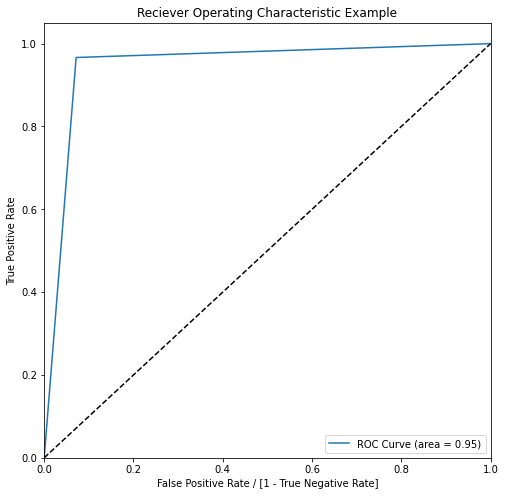

In [118]:
# Plotting the ROC curve

draw_roc(y_train_rf_best_pred, y_train_rf_smote)

In [123]:
# Feature importance

feature_importance = pd.DataFrame({
    'Variable': X_train_rf_smote.columns, 
    'Imp': rf_best.feature_importances_
}).sort_values(by='Imp', ascending=False)

feature_importance

Variable       Imp
0                       amt  0.794439
7                trans_hour  0.068494
13            category_home  0.017801
19    category_shopping_pos  0.013082
9    category_gas_transport  0.012122
2                  city_pop  0.010447
16        category_misc_pos  0.009886
1                    gender  0.009780
18    category_shopping_net  0.009494
20          category_travel  0.009201
14       category_kids_pets  0.007808
11     category_grocery_pos  0.007806
15        category_misc_net  0.007549
8      category_food_dining  0.007513
12  category_health_fitness  0.004501
3              customer_age  0.004133
17   category_personal_care  0.004097
10     category_grocery_net  0.001076
6               trans_month  0.000433
4              distance_lat  0.000219
5             distance_long  0.000118

In [114]:
# Printing the metrices and scores for the validation data

y_val_rf_best_pred = rf_best.predict(X_val_rf)

print('AUC:', roc_auc_score(y_val_rf, y_val_rf_best_pred))
print('Accuracy"', accuracy_score(y_val_rf, y_val_rf_best_pred))
print('Recall:', recall_score(y_val_rf, y_val_rf_best_pred))
print('Precision:', precision_score(y_val_rf, y_val_rf_best_pred))

AUC: 0.9432906286383711
Accuracy" 0.967558090811639
Recall: 0.9187388987566607
Precision: 0.14263063559906244


The AUC of ~0.95 and 0.94 is a good score, let us see the model performance on the test data.

In [112]:
# Splitting the test dataset into X and y

X_test_rf = test_df_2.drop('is_fraud', axis=1)
y_test_rf = test_df_2['is_fraud']
print(y_test_rf.head())
X_test_rf.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64


amt  gender  city_pop  customer_age  distance_lat  distance_long  \
0   2.86       1    333497          52.0      0.020491       0.265214   
1  29.84       0       302          30.0      0.870202       0.475569   
2  41.28       0     34496          49.0      0.177090       0.659611   
3  60.05       1     54767          32.0      0.242698       0.063961   
4   3.19       1      1126          64.0      0.706248       0.867734   

   trans_month  trans_hour  category_food_dining  category_gas_transport  \
0            6          12                     0                       0   
1            6          12                     0                       0   
2            6          12                     0                       0   
3            6          12                     0                       0   
4            6          12                     0                       0   

   category_grocery_net  category_grocery_pos  category_health_fitness  \
0                     0                     0                        0   
1                     0                     0                        0   
2                     0                     0                        1   
3                     0                     0                        0   
4                     0                     0                        0   

   category_home  category_kids_pets  category_misc_net  category_misc_pos  \
0              0                   0                  0                  0   
1              0                   0                  0                  0   
2              0                   0                  0                  0   
3              0                   0                  0                  1   
4              0                   0                  0                  0   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       1                      0                      0   
1                       1                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   

   category_travel  
0                0  
1                0  
2                0  
3                0  
4                1

In [115]:
# Making predictions, displaying the metrices and the scores

y_test_rf_pred = rf_best.predict(X_test_rf)

print('AUC:', roc_auc_score(y_test_rf, y_test_rf_pred))
print('Accuracy"', accuracy_score(y_test_rf, y_test_rf_pred))
print('Recall:', recall_score(y_test_rf, y_test_rf_pred))
print('Precision:', precision_score(y_test_rf, y_test_rf_pred))

AUC: 0.9434263021653325
Accuracy" 0.9687072063398948
Recall: 0.9179487179487179
Precision: 0.10264296512537142


### Model Performance on the Original Train DF

In [120]:
# Splitting train df into X and y

X_train = train_df_2.drop('is_fraud', axis=1)
y_train = train_df_2['is_fraud']

In [121]:
# Predictions and metrices

y_train_pred = rf_best.predict(X_train)

print('AUC:', roc_auc_score(y_train, y_train_pred))
print('Accuracy"', accuracy_score(y_train, y_train_pred))
print('Recall:', recall_score(y_train, y_train_pred))
print('Precision:', precision_score(y_train, y_train_pred))

AUC: 0.9443918647030283
Accuracy" 0.9676480228276167
Recall: 0.920863309352518
Precision: 0.14320046407557802


## Cost-Benefit Analysis

In [125]:
# Making copies of the y_test_rf and y_test_rf_pred for a more convenient merge

y_test = y_test_rf.copy()
y_test_pred = y_test_rf_pred.copy()

In [127]:
# Making a subset of train_df for cost-benefit analysis

train_merge = train_df[['trans_date_trans_time', 'amt', 'is_fraud']]
train_merge.head()

trans_date_trans_time     amt  is_fraud
0   2019-01-01 00:00:18    4.97         0
1   2019-01-01 00:00:44  107.23         0
2   2019-01-01 00:00:51  220.11         0
3   2019-01-01 00:01:16   45.00         0
4   2019-01-01 00:03:06   41.96         0

In [128]:
# Making y_train_pred_merge for merging with train_merge

y_train_pred_merge = pd.DataFrame(y_train_pred)
y_train_pred_merge.head()

0
0  0
1  0
2  0
3  0
4  0

In [129]:
# Merging train_merge with y_train_pred_merge

train_merge_ready = pd.concat([train_merge, y_train_pred_merge], axis=1)
train_merge_ready = train_merge_ready.rename(columns={0: 'is_fraud_pred'})
train_merge_ready.head()

trans_date_trans_time     amt  is_fraud  is_fraud_pred
0   2019-01-01 00:00:18    4.97         0              0
1   2019-01-01 00:00:44  107.23         0              0
2   2019-01-01 00:00:51  220.11         0              0
3   2019-01-01 00:01:16   45.00         0              0
4   2019-01-01 00:03:06   41.96         0              0

In [133]:
train_merge_ready.shape

(1296675, 4)

In [130]:
# Making a subset of test_df for cost-benefit analysis

test_merge = test_df[['trans_date_trans_time', 'amt', 'is_fraud']]
test_merge.head()

trans_date_trans_time    amt  is_fraud
0   2020-06-21 12:14:25   2.86         0
1   2020-06-21 12:14:33  29.84         0
2   2020-06-21 12:14:53  41.28         0
3   2020-06-21 12:15:15  60.05         0
4   2020-06-21 12:15:17   3.19         0

In [131]:
# Making y_test_pred_merge for merging with test_merge

y_test_pred_merge = pd.DataFrame(y_test_pred)
y_test_pred_merge.head()

0
0  0
1  0
2  0
3  0
4  0

In [132]:
# Merging test_merge with y_test_pred_merge

test_merge_ready = pd.concat([test_merge, y_test_pred_merge], axis=1)
test_merge_ready = test_merge_ready.rename(columns={0: 'is_fraud_pred'})
test_merge_ready.head()

trans_date_trans_time    amt  is_fraud  is_fraud_pred
0   2020-06-21 12:14:25   2.86         0              0
1   2020-06-21 12:14:33  29.84         0              0
2   2020-06-21 12:14:53  41.28         0              0
3   2020-06-21 12:15:15  60.05         0              0
4   2020-06-21 12:15:17   3.19         0              0

In [134]:
test_merge_ready.shape

(555719, 4)

In [135]:
# Merging train_merge_ready with test_merge_ready for cost-benefit analysis

merged_df = pd.concat([train_merge_ready, test_merge_ready], axis=0)
print(merged_df.shape)
merged_df.head()

(1852394, 4)


trans_date_trans_time     amt  is_fraud  is_fraud_pred
0   2019-01-01 00:00:18    4.97         0              0
1   2019-01-01 00:00:44  107.23         0              0
2   2019-01-01 00:00:51  220.11         0              0
3   2019-01-01 00:01:16   45.00         0              0
4   2019-01-01 00:03:06   41.96         0              0

In [136]:
merged_df['month'] = pd.DatetimeIndex(merged_df['trans_date_trans_time']).month
merged_df['year'] = pd.DatetimeIndex(merged_df['trans_date_trans_time']).year
merged_df.head()

trans_date_trans_time     amt  is_fraud  is_fraud_pred  month  year
0   2019-01-01 00:00:18    4.97         0              0      1  2019
1   2019-01-01 00:00:44  107.23         0              0      1  2019
2   2019-01-01 00:00:51  220.11         0              0      1  2019
3   2019-01-01 00:01:16   45.00         0              0      1  2019
4   2019-01-01 00:03:06   41.96         0              0      1  2019

In [159]:
# Displaying number of transactions per month

monthly_transactions = merged_df.groupby(['year', 'month'])['amt'].count()
monthly_transactions

year  month
2019  1         52525
      2         49866
      3         70939
      4         68078
      5         72532
      6         86064
      7         86596
      8         87359
      9         70652
      10        68758
      11        70421
      12       141060
2020  1         52202
      2         47791
      3         72850
      4         66892
      5         74343
      6         87805
      7         85848
      8         88759
      9         69533
      10        69348
      11        72635
      12       139538
Name: amt, dtype: int64

In [160]:
# Displaying average number of transactions per month

print('Avg monthly number of transactions:', monthly_transactions.sum()/monthly_transactions.count())

Avg monthly number of transactions: 77183.08333333333


In [161]:
# Displaying number of fraudulent transactions per month

monthly_transactions_fraud = merged_df[merged_df['is_fraud']==1].groupby(['year', 'month'])['amt'].count()
monthly_transactions_fraud

year  month
2019  1        506
      2        517
      3        494
      4        376
      5        408
      6        354
      7        331
      8        382
      9        418
      10       454
      11       388
      12       592
2020  1        343
      2        336
      3        444
      4        302
      5        527
      6        467
      7        321
      8        415
      9        340
      10       384
      11       294
      12       258
Name: amt, dtype: int64

In [162]:
# Displaying average number of fraudulent transactions per month

print('Avg monthly number of fraudulent transactions:', 
      monthly_transactions_fraud.sum()/monthly_transactions_fraud.count())

Avg monthly number of fraudulent transactions: 402.125


In [163]:
# Displaying average amount of fraudulent transactions

print('Avg amount of fraudulent transactions:', 
     merged_df[merged_df['is_fraud']==1]['amt'].mean())

Avg amount of fraudulent transactions: 530.6614122888789


In [169]:
# Displaying monthly number of transactions classified as fraudulent by the model

monthly_transactions_fraud_pred = merged_df[merged_df['is_fraud_pred']==1].groupby(['year', 'month'])['amt'].count()
monthly_transactions_fraud_pred

year  month
2019  1        2181
      2        2083
      3        2736
      4        2559
      5        2772
      6        3094
      7        3114
      8        3239
      9        2614
      10       2629
      11       2332
      12       4622
2020  1        2048
      2        1890
      3        2833
      4        2504
      5        2841
      6        3282
      7        3018
      8        3269
      9        2585
      10       2705
      11       2327
      12       4174
Name: amt, dtype: int64

In [167]:
# Displaying the average number of transactions per month detected as fraudulent by the model (TF)

print('Avg monthly number of transactions detected as fraudulent by the model (TF):', 
      monthly_transactions_fraud_pred.sum()/monthly_transactions_fraud_pred.count())

Avg monthly number of transactions detected as fraudulent by the model (TF): 2810.4583333333335


In [170]:
# Displaying monthly number of transactions that are fraudulent but not detected by the model (FN)

monthly_transactions_fraud_misclassified = merged_df[(merged_df['is_fraud_pred']==0) & (merged_df['is_fraud']==1)].groupby(['year', 'month'])['amt'].count()
monthly_transactions_fraud_misclassified

year  month
2019  1        47
      2        45
      3        44
      4        24
      5        36
      6        32
      7        22
      8        32
      9        43
      10       37
      11       25
      12       47
2020  1        22
      2        20
      3        34
      4        22
      5        40
      6        32
      7        35
      8        40
      9        12
      10       38
      11       23
      12       18
Name: amt, dtype: int64

In [171]:
# Displaying the avg number of transactions per month that are fraudulent but not detected by the model (FN)

print('Avg monthly number of transactions misclassified as non-fraudulent by the model (FN):', 
      monthly_transactions_fraud_misclassified.sum()/monthly_transactions_fraud_misclassified.count())

Avg monthly number of transactions misclassified as non-fraudulent by the model (FN): 32.083333333333336


This way, before implementing the current model, bank lost, on average, around **$213,392.22** per month.

After implementing the current model, the average monthly losses of the bank are estimated to be around **$21,241.07**. 

Which is around *10\%* of the losses before implementing the model. 

This way, saving around **$192,151.15** per month.